# Automate change detection and severity mapping using Digital Earth Australia
This script shows a simple work flow of change detection and severity mapping using DEA and ANU-developed burn_mapping tools. 

In [1]:
from loaddea import loaddea #for extracting cloudy free data from datacube
from disttogeomedian import geomedian_and_dists#for calculation of reference data for the change detection, i.e. geometric medians and cosine distance

## Define study area
The following cell shows the required inputs for the change/severity mapping

Three criterias are available to choose in the severity mapping, the default one is Method3. Data and time can be modified to run for the whole period or annual basis.

Method 1: only use cosine distance as an indicator for change

Method 2: use cosine distance together with NBR<0

Method 3: use both cosine distance, NBR euclidean distance, and NBR change direction for change detection

The following example shows the severity map for 2015.07 to 2016.06 using method 2 for fire-related sever NBR decrease mapping


In [46]:
lon = (146.0852,146.3702) # min to max
lat = (-41.5985,-41.7314)
reftime = ('2013-01-01','2017-12-31') # period used for the calculation of geometric median
res = (-100,100) # resolution in meters
sensor = 8
severity_period = ('2016-01-01','2016-12-31') # period of interest for change/severity mapping
method = 2 # change detection method

## load cloud free data for the given region
This might take a while depends on the number of years and extent 

In [3]:
data = loaddea(x=lon,y=lat,time=reftime,resolution=res,landsat_numbers=[sensor]) 

In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 48, x: 259, y: 171)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-31T00:00:28 ...
  * y        (y) float64 -4.614e+06 -4.615e+06 -4.615e+06 -4.615e+06 ...
  * x        (x) float64 1.198e+06 1.198e+06 1.198e+06 1.198e+06 1.199e+06 ...
Data variables:
    blue     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    green    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    red      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    nir      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    swir1    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    swir2    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    pixmask  (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 ...
Attributes:
    crs:      EPSG:3577

## calculate the geometric median and cosine distance 
The following fuction returns all the outputs in one dataset. 

For geometric median, the output saved in a array with ['bands','y','x'], the bands from 0 to 5 refer to 'blue','green','red','nir','swir','swir2'

The output will be saved in a netCDF file with the name of: GMandDist_latmin_latmax_lonmin_lonmax_reftime_Landsat_sensornumber_resolution.nc

In [5]:
out = geomedian_and_dists(data)
filename = 'GMandDist_'+str(lat[0])+'_'+str(lat[1])+'_'+str(lon[0])+'_'+str(lon[1])+'_'+reftime[0]+'_'+reftime[1]+'_Landsat'+str(sensor)+'_'+str(res[1])+'m.nc'
out.to_netcdf(filename)
out

<xarray.Dataset>
Dimensions:        (bands: 6, time: 48, x: 259, y: 171)
Coordinates:
  * time           (time) datetime64[ns] 2013-07-31T00:00:28 ...
  * y              (y) float64 -4.614e+06 -4.615e+06 -4.615e+06 -4.615e+06 ...
  * x              (x) float64 1.198e+06 1.198e+06 1.198e+06 1.198e+06 ...
  * bands          (bands) float64 0.0 1.0 2.0 3.0 4.0 5.0
Data variables:
    GeoMed         (bands, y, x) float64 120.8 162.2 141.7 115.6 118.9 144.1 ...
    NBR            (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    CosDist        (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    NBRDist        (time, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    NegtiveChange  (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    NBRoutlier     (y, x) float64 0.07872 0.1025 0.08163 0.06061 0.0822 ...
    CDistoutlier   (y, x) float64 0.006666 0.0163 0.005423 0.003064 0.005645 ...
Attributes:
    crs:      EPSG:3577

## change/severity mapping 
the following case shows the severity mapping for Central Plateau for 2015-2016

In [66]:
from changedetection import severity_mapping
%matplotlib inline

There were 7 observations during 2016-01-01 to 2016-12-31.


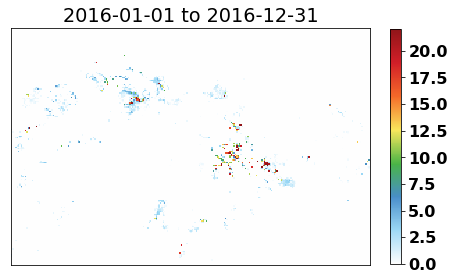

In [62]:
firedata,severity=severity_mapping(out,severity_period,method,plot=True)

firedata is a dataset including the easting, northing, severity, duration, startdate for each detected burned pixel

severity stores the severity in 2-dimension

In [44]:
firedata

,Duration,Easting,Northing,Severity,Start-Date
0,31.999954,1220550.0,-4614550.0,0.714161,2017-11-14 23:58:43
1,112.000058,1220050.0,-4614650.0,5.207495,2017-08-26 23:58:34
2,47.999919,1220250.0,-4614650.0,1.276682,2017-10-29 23:58:46
3,31.999954,1220650.0,-4614650.0,0.902556,2017-11-14 23:58:43
4,31.999954,1220750.0,-4614650.0,1.078814,2017-11-14 23:58:43
5,31.999954,1221250.0,-4614750.0,0.416350,2017-11-14 23:58:43
6,31.999954,1221050.0,-4614850.0,1.003388,2017-11-14 23:58:43
7,31.999954,1221150.0,-4614850.0,0.704311,2017-11-14 23:58:43
8,15.999965,1221650.0,-4614850.0,0.697109,2017-10-29 23:58:46
9,15.999965,1221750.0,-4614850.0,0.804467,2017-10-29 23:58:46


## Annual severity mapping 
annual severity mapping for 2013-2017 (calendar year)

There were 14 observations during 2014-01-01 to 2014-12-31.
There were 12 observations during 2015-01-01 to 2015-12-31.
There were 7 observations during 2016-01-01 to 2016-12-31.
There were 13 observations during 2017-01-01 to 2017-12-31.


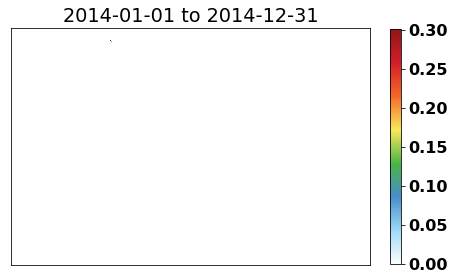

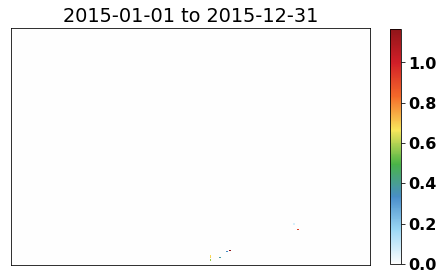

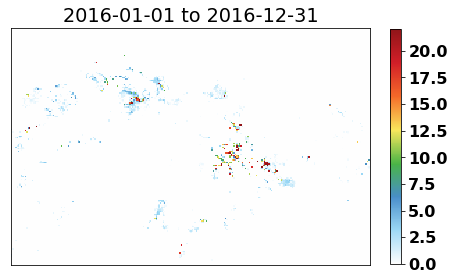

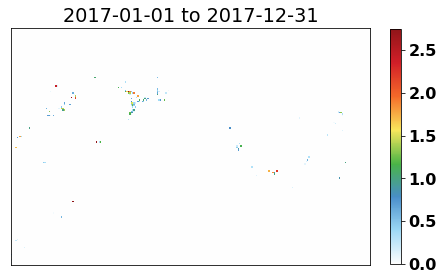

In [65]:
for yr in range(2014,2018):
    severity_period = (str(yr)+'-01-01',str(yr)+'-12-31')    
    firedata,severity=severity_mapping(out,severity_period,method,plot=True)

There were 2 observations from 2013-01-01 to 2013-12-31.
No change found from 2013-01-01 to 2013-12-31.
